In [1]:
import sys
import os

current_dir = os.getcwd() 
code_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

if code_dir not in sys.path:
    sys.path.append(code_dir)

from src.models.linear_models import LinearRegression
from src.loss_functions.regression_losses import MeanSquaredError, MeanAbsoluteError
from src.optimisers.gradient_based import BatchGradientDescent, StochasticGradientDescent, MiniBatchGradientDescent
from src.optimisers.cellular_automata import CellularAutomataOptimiser
from src.utils import configurations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SK_LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
np.random.seed(configurations.SEED)

In [3]:
train_mse_results = []
test_mse_results = []
train_mae_results = []
test_mae_results = []
train_r2_results = []
test_r2_results = []

In [4]:
df = pd.read_csv("../datasets/diabetes.csv")
# df = pd.read_csv("../datasets/california_housing.csv")

In [5]:
df.shape

(442, 11)

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=configurations.TEST_SIZE, random_state=configurations.SEED)

In [8]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [9]:
n_features = X_train.shape[1]

model = LinearRegression(n_features=n_features)
mse = MeanSquaredError()
mae = MeanAbsoluteError()

In [10]:
batch_gradient_descent = BatchGradientDescent(configurations.ALPHA)
stochastic_gradient_descent = StochasticGradientDescent(configurations.ALPHA)
mini_batch_gradient_descent = MiniBatchGradientDescent(configurations.ALPHA, batch_size=16)
ca_optimiser = CellularAutomataOptimiser(L=5, mu=0.01, omega=0.8)

In [11]:
def plot_loss(loss_history, optimiser):
    plt.figure(figsize=(8, 4))
    plt.plot(loss_history, label=f"{optimiser} Loss", color='blue')
    
    plt.title(f"{optimiser} Training Loss Convergence")
    plt.xlabel(f"Iteration (Max Iters: {configurations.MAX_ITERS})")
    plt.ylabel("Loss")
    
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
## BATCH GRADIENT DESCENT (BGD)
bgd_results = batch_gradient_descent.optimise(model, mse, X_train, y_train, max_iters=configurations.MAX_ITERS)
bgd_loss_history = bgd_results["loss_history"]
model.set_params(bgd_results["parameters"])

y_train_pred_bgd = model.predict(X_train)
y_test_pred_bgd = model.predict(X_test)

train_mse_bgd = mse.compute_loss(y_train, y_train_pred_bgd)
test_mse_bgd = mse.compute_loss(y_test, y_test_pred_bgd)
train_mae_bgd = mae.compute_loss(y_train, y_train_pred_bgd)
test_mae_bgd = mae.compute_loss(y_test, y_test_pred_bgd)
train_r2_bgd = r2_score(y_train, y_train_pred_bgd)
test_r2_bgd = r2_score(y_test, y_test_pred_bgd)

train_mse_results.append(train_mse_bgd)
test_mse_results.append(test_mse_bgd)
train_mae_results.append(train_mae_bgd)
test_mae_results.append(test_mae_bgd)
train_r2_results.append(train_r2_bgd)
test_r2_results.append(test_r2_bgd)

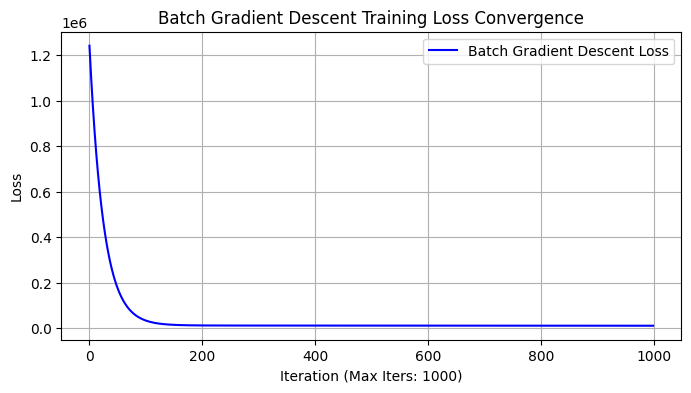

In [13]:
plot_loss(bgd_loss_history, "Batch Gradient Descent")

In [14]:
## STOCHASTIC GRADIENT DESCENT (SGD)
sgd_results = stochastic_gradient_descent.optimise(model, mse, X_train, y_train, max_iters=configurations.MAX_ITERS)
sgd_loss_history = sgd_results["loss_history"]
model.set_params(sgd_results["parameters"])

y_train_pred_sgd = model.predict(X_train)
y_test_pred_sgd = model.predict(X_test)

train_mse_sgd = mse.compute_loss(y_train, y_train_pred_sgd)
test_mse_sgd = mse.compute_loss(y_test, y_test_pred_sgd)
train_mae_sgd = mae.compute_loss(y_train, y_train_pred_sgd)
test_mae_sgd = mae.compute_loss(y_test, y_test_pred_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

train_mse_results.append(train_mse_sgd)
test_mse_results.append(test_mse_sgd)
train_mae_results.append(train_mae_sgd)
test_mae_results.append(test_mae_sgd)
train_r2_results.append(train_r2_sgd)
test_r2_results.append(test_r2_sgd)

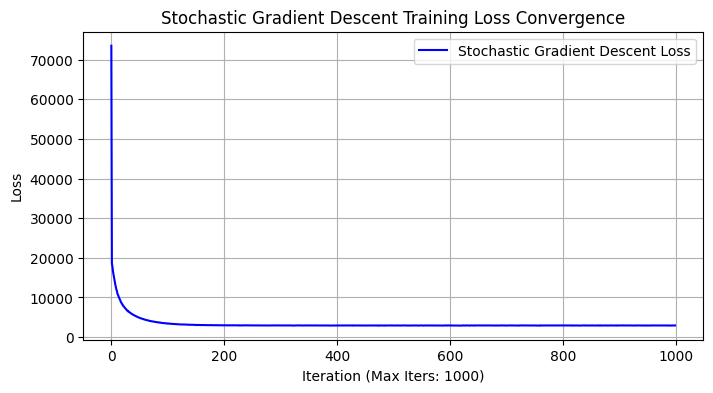

In [15]:
plot_loss(sgd_loss_history, "Stochastic Gradient Descent")

In [16]:
## MINI-BATCH GRADIENT DESCENT (MBGD)
mini_bgd_results = mini_batch_gradient_descent.optimise(model, mse, X_train, y_train, max_iters=configurations.MAX_ITERS)
mini_bgd_loss_history = mini_bgd_results["loss_history"]
model.set_params(mini_bgd_results["parameters"])

y_train_pred_mbgd = model.predict(X_train)
y_test_pred_mbgd = model.predict(X_test)

train_mse_mbgd = mse.compute_loss(y_train, y_train_pred_mbgd)
test_mse_mbgd = mse.compute_loss(y_test, y_test_pred_mbgd)
train_mae_mbgd = mae.compute_loss(y_train, y_train_pred_mbgd)
test_mae_mbgd = mae.compute_loss(y_test, y_test_pred_mbgd)
train_r2_mbgd = r2_score(y_train, y_train_pred_mbgd)
test_r2_mbgd = r2_score(y_test, y_test_pred_mbgd)

train_mse_results.append(train_mse_mbgd)
test_mse_results.append(test_mse_mbgd)
train_mae_results.append(train_mae_mbgd)
test_mae_results.append(test_mae_mbgd)
train_r2_results.append(train_r2_mbgd)
test_r2_results.append(test_r2_mbgd)

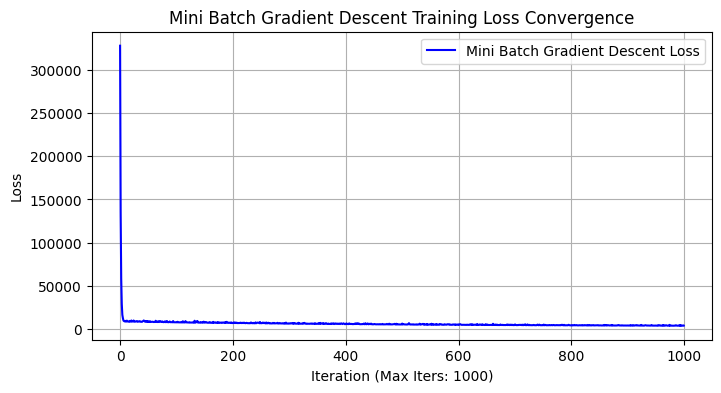

In [17]:
plot_loss(mini_bgd_loss_history, "Mini Batch Gradient Descent")

In [18]:
## CELLULAR AUTOMATA
model.set_param_bounds([(-1000.0, 1000.0)]) # for diabetes dataset
# model.set_param_bounds([(-10.0, 10.0)]) # for california housing dataset

ca_max_iters = 1000
ca_results = ca_optimiser.optimise(model, mse, X_train, y_train, max_iters=ca_max_iters)
# print(f"cellular automata params: {ca_results['parameters']}")
ca_loss_history = ca_results["loss_history"]
model.set_params(ca_results['parameters'])

y_train_pred_ca = model.predict(X_train)
y_test_pred_ca = model.predict(X_test)

train_mse_ca = mse.compute_loss(y_train, y_train_pred_ca)
test_mse_ca = mse.compute_loss(y_test, y_test_pred_ca)
train_mae_ca = mae.compute_loss(y_train, y_train_pred_ca)
test_mae_ca = mae.compute_loss(y_test, y_test_pred_ca)
train_r2_ca = r2_score(y_train, y_train_pred_ca)
test_r2_ca = r2_score(y_test, y_test_pred_ca)

train_mse_results.append(train_mse_ca)
test_mse_results.append(test_mse_ca)
train_mae_results.append(train_mae_ca)
test_mae_results.append(test_mae_ca)
train_r2_results.append(train_r2_ca)
test_r2_results.append(test_r2_ca)

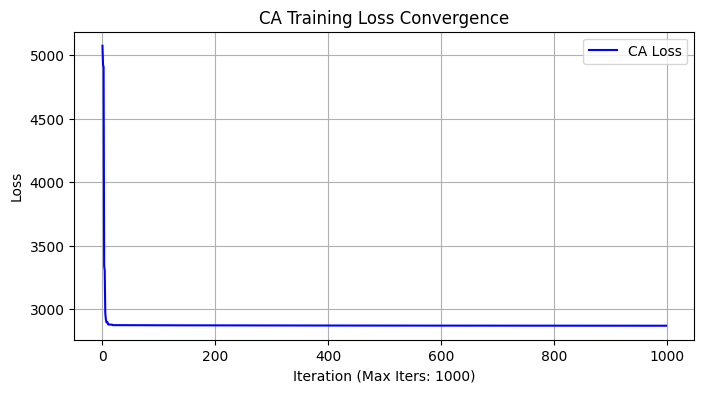

In [19]:
plot_loss(ca_loss_history, "CA")

In [20]:
## SKLEARN LINEAR REGRESSION
sk_model = SK_LinearRegression()
sk_model.fit(X_train, y_train)

# sk_params = [sk_model.coef_, sk_model.intercept_]
# print(f"sk params : {sk_params}")

y_train_pred_sk = sk_model.predict(X_train)
y_test_pred_sk = sk_model.predict(X_test)

train_mse_sk = mse.compute_loss(y_train, y_train_pred_sk)
test_mse_sk = mse.compute_loss(y_test, y_test_pred_sk)
train_mae_sk = mae.compute_loss(y_train, y_train_pred_sk)
test_mae_sk = mae.compute_loss(y_test, y_test_pred_sk)
train_r2_sk = r2_score(y_train, y_train_pred_sk)
test_r2_sk = r2_score(y_test, y_test_pred_sk)

train_mse_results.append(train_mse_sk)
test_mse_results.append(test_mse_sk)
train_mae_results.append(train_mae_sk)
test_mae_results.append(test_mae_sk)
train_r2_results.append(train_r2_sk)
test_r2_results.append(test_r2_sk)

In [21]:
print("="*50)
print("             OPTIMIZATION ALGORITHMS RESULTS")
print("="*50)
print(f"Configuration: MAX_ITERS={configurations.MAX_ITERS}, TEST_SIZE={configurations.TEST_SIZE}, ALPHA={configurations.ALPHA}, SEED={configurations.SEED}")
print(f"Cellular Automata Optimiser Configurations: L={ca_optimiser.L}, μ={ca_optimiser.mu}, ω={ca_optimiser.omega}, max_iters={ca_max_iters}")
print("="*50)

optimizers = ["Batch Gradient Descent", "Stochastic Gradient Descent", "Mini-Batch Gradient Descent", "Cellular Automata", "Sklearn LinearRegression"]

for i, optimizer in enumerate(optimizers):
    print(f"--- {optimizer} ---")
    print(f"  Training MSE: {train_mse_results[i]:.4f}")
    print(f"  Testing MSE:  {test_mse_results[i]:.4f}")
    print(f"  Training MAE: {train_mae_results[i]:.4f}")
    print(f"  Testing MAE:  {test_mae_results[i]:.4f}")
    print(f"  Training r2 score: {train_r2_results[i]:.4f}")
    print(f"  Testing r2 score: {test_r2_results[i]:.4f}")
    print()

             OPTIMIZATION ALGORITHMS RESULTS
Configuration: MAX_ITERS=1000, TEST_SIZE=0.2, ALPHA=0.01, SEED=42
Cellular Automata Optimiser Configurations: L=5, μ=0.01, ω=0.8, max_iters=1000
--- Batch Gradient Descent ---
  Training MSE: 10783.0382
  Testing MSE:  11327.6397
  Training MAE: 84.5281
  Testing MAE:  85.1713
  Training r2 score: -0.7746
  Testing r2 score: -1.1380

--- Stochastic Gradient Descent ---
  Training MSE: 2891.1742
  Testing MSE:  2881.6197
  Training MAE: 43.6596
  Testing MAE:  42.8752
  Training r2 score: 0.5242
  Testing r2 score: 0.4561

--- Mini-Batch Gradient Descent ---
  Training MSE: 4224.2428
  Testing MSE:  3702.9936
  Training MAE: 52.7893
  Testing MAE:  50.4661
  Training r2 score: 0.3048
  Testing r2 score: 0.3011

--- Cellular Automata ---
  Training MSE: 2870.9615
  Testing MSE:  2919.6380
  Training MAE: 43.4877
  Testing MAE:  42.9476
  Training r2 score: 0.5275
  Testing r2 score: 0.4489

--- Sklearn LinearRegression ---
  Training MSE: 2868